In [1]:
import numpy as np
import  matplotlib.pyplot as plt
import pandas as pd
import sklearn.linear_model
import sklearn.model_selection
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn import metrics
import itertools as it
from sklearn.metrics import f1_score 
%matplotlib inline

# Parte 1

In [2]:
data = pd.read_csv('Default.csv')
data['studentNum'] = list(map(lambda x : 1 if x=="Yes" else 0 , data.student))
data['defaultNum'] = list(map(lambda x : 1 if x=="Yes" else 0 , data.default))
data.head()

,Unnamed: 0,default,student,balance,income,studentNum,defaultNum
0,1,No,No,729.526495,44361.625074,0,0
1,2,No,Yes,817.180407,12106.134700,1,0
2,3,No,No,1073.549164,31767.138947,0,0
3,4,No,No,529.250605,35704.493935,0,0
4,5,No,No,785.655883,38463.495879,0,0


In [3]:
x_features = data.columns[3:6]

In [4]:
clf = LinearDiscriminantAnalysis()
clf.fit(data[x_features],data.defaultNum)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [5]:
prediction = clf.predict_proba(data[x_features])

In [6]:
def calc_default(threshold,proba_default):
    return list(map(lambda x : 1 if x > threshold else 0 , proba_default))

In [7]:
thresholds = np.linspace(0.0,1,150)
error_frac = []
error_total = []
error_default = []
false_positive_rate = []
true_positive_rate = []
for th in range(len(thresholds)):
    pred = calc_default(thresholds[th],prediction[:,1])
    tn,fp,fn,tp = confusion_matrix(data.defaultNum,pred).ravel()
    error_frac.append(fp/(tn+fp))
    error_total.append((fn+fp)/(tn+fp+fn+tp))
    error_default.append(fn/(fn+tp))
    false_positive_rate.append(fp/(tn+fp))
    true_positive_rate.append(tp/(fn+tp))

(0, 0.5)

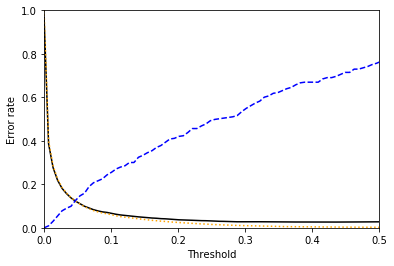

In [8]:
plt.plot(thresholds,error_total,c = 'black')
plt.plot(thresholds,error_frac, c = 'orange', linestyle = ':')
plt.plot(thresholds,error_default, c = 'blue', linestyle = '--')
plt.xlabel('Threshold')
plt.ylabel('Error rate')
plt.ylim(0,1)
plt.xlim(0,0.5)

Text(0.5,1,'ROC Curve')

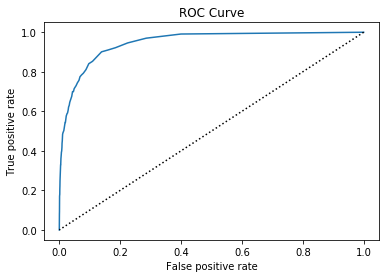

In [9]:
plt.plot(false_positive_rate,true_positive_rate)
plt.plot(false_positive_rate,false_positive_rate,linestyle = ":", c = "black")
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title("ROC Curve")

In [10]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression

In [11]:
clf = LogisticRegression().fit(data[x_features],data.defaultNum)
predictions = clf.predict_proba(data[x_features])

In [12]:
th = np.linspace(0.0,1,10000)
recall = []
precision = []
for i in range(len(th)):
    pred = calc_default(th[i],predictions[:,1])
    tn,fp,fn,tp = confusion_matrix(data.defaultNum,pred).ravel()
    recall.append(tp/(tp+fn))
    precision.append(tp/(tp+fp))

/home/mneira011/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in long_scalars
  


(0, 1)

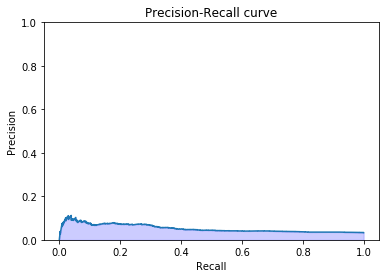

In [13]:
plt.plot(recall,precision)
plt.fill_between(recall,precision,alpha = 0.2, color = 'blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.ylim(0,1)

In [14]:
boston = pd.read_csv('Boston.csv')
boston['crime'] = list(map(lambda x : 1 if x > np.mean(boston.crim) else 0 , boston.crim))
x_features = boston.columns[2:15]
boston.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,crime
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,0
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,0
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,0


In [15]:
clf = LogisticRegression().fit(boston[x_features],boston.crime)

In [16]:
predictors_lr = x_features[abs(clf.coef_[0])>0.5]
predictors_lr

Index(['rm', 'rad', 'ptratio'], dtype='object')

In [17]:
lda = LinearDiscriminantAnalysis().fit(boston[x_features],boston.crime)

In [18]:
predictors_lda = x_features[abs(lda.coef_[0])>0.5]
predictors_lda

Index(['chas', 'nox', 'rm', 'rad'], dtype='object')

In [19]:
from sklearn.metrics import precision_recall_curve

In [20]:
precision_lr, recall_lr, _ = precision_recall_curve(boston.crime, clf.predict_proba(boston[x_features])[:,1])

In [21]:
precision_lda, recall_lda, _ = precision_recall_curve(boston.crime, lda.predict_proba(boston[x_features])[:,1])

Text(0.5,1,'Recall-precision curve')

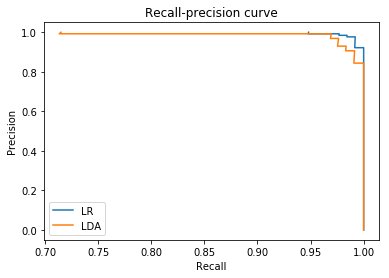

In [22]:
plt.plot(precision_lr, recall_lr, label = 'LR')
plt.plot(precision_lda, recall_lda, label = 'LDA')
plt.legend()
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Recall-precision curve')

In [23]:
fpr_lr, tpr_lr, th_lr = metrics.roc_curve(boston.crime, clf.predict_proba(boston[x_features])[:,1])
fpr_lda, tpr_lda, th_lda = metrics.roc_curve(boston.crime, lda.predict_proba(boston[x_features])[:,1])

Text(0.5,1,'ROC Curve')

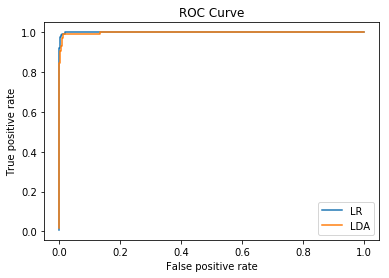

In [24]:
plt.plot(fpr_lr,tpr_lr, label = 'LR')
plt.plot(fpr_lda, tpr_lda, label = 'LDA')
plt.legend()
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title("ROC Curve")

Dados los dos algoritmos de clasificacion  se puede afirmar que logistic regression se adapta mejor que linear discriminant analysis, teniendo en cuenta esto se puede afirmar que los mejores predictores para predecir el target son 'rm', 'rad', 'ptratio'. 

Por otro lado, dado que se tienen dos algoritmos de clasificacion se podrian estimar los mejores predictores tomando la interseccion entre los mejores predictores que arrojan ambos algorirmos. En este caso los mejores predictores para el target serian 'rm', 'rad'.

In [25]:
boston = pd.read_csv('Boston.csv')
boston['crime'] = list(map(lambda x : 1 if x > np.mean(boston.crim) else 0 , boston.crim))
x_features = boston.columns[2:15]
boston.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,crime
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,0
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,0
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,0


In [42]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(boston,test_size = 0.25)
def calc_default(threshold,proba_default):
    return list(map(lambda x : 1 if x > threshold else 0 , proba_default))

In [53]:
#mejor f1 dado una combinacion dada

best_x = []
best_f1 = []
for i in range(1,3):
    group = list(it.combinations(boston[x_features],i))

    for k in range(len(group)):
        f1 = np.ones(len(group))
        lr = LogisticRegression().fit(train[list(group[k])],train.crime)

        ths = np.linspace(0,1,20)
        for th in ths:
            pred =  calc_default(th,lr.predict_proba(test[list(group[k])] )[:,1])
#             print(pred)
            f1[k] = f1_score(test.crime, pred)
        best_f1.append( max(f1))
#         print(f1==max(f1))
#         print(f1)
    group=np.array(group)
    best_x.append(group[f1==max(f1)])
            

/home/mneira011/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Dadas las curvas ROC y precision recall, el mejor algoritmo de clasificacion es linear regression y dados los valores de f1 escore, el mejor predictor es 'rm'

In [57]:
autos = pd.read_csv('Auto.csv')
x_features = autos.columns[2:-2]
autos['mpg'] = list(map(lambda x : 1 if x > np.mean(autos.mpg) else 0 , autos.mpg))

In [60]:
clf = LogisticRegression().fit(autos[x_features],autos.mpg)
predictors_lr = x_features[abs(clf.coef_[0])>0.5]
predictors_lr

Index([], dtype='object')

In [61]:
lda = LinearDiscriminantAnalysis().fit(autos[x_features],autos.mpg)
predictors_lda = x_features[abs(lda.coef_[0])>0.5]
predictors_lda

Index(['cylinders'], dtype='object')

In [62]:
precision_lr, recall_lr, _ = precision_recall_curve(autos.mpg, clf.predict_proba(autos[x_features])[:,1])
precision_lda, recall_lda, _ = precision_recall_curve(autos.mpg, clf.predict_proba(autos[x_features])[:,1])

Text(0.5,1,'Recall-precision curve')

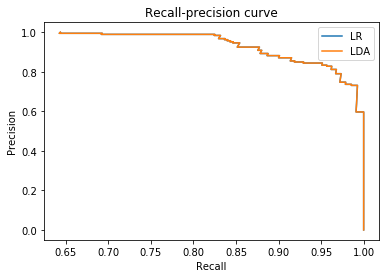

In [63]:
plt.plot(precision_lr, recall_lr, label = 'LR')
plt.plot(precision_lda, recall_lda, label = 'LDA')
plt.legend()
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Recall-precision curve')

In [58]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(autos,test_size = 0.25)
def calc_default(threshold,proba_default):
    return list(map(lambda x : 1 if x > threshold else 0 , proba_default))

In [59]:
best_x = []
best_f1 = []
for i in range(1,3):
    group = list(it.combinations(autos[x_features],i))

    for k in range(len(group)):
        f1 = np.ones(len(group))
        lr = LogisticRegression().fit(train[list(group[k])],train.mpg)

        ths = np.linspace(0,1,20)
        for th in ths:
            pred =  calc_default(th,lr.predict_proba(test[list(group[k])] )[:,1])
#             print(pred)
            f1[k] = f1_score(test.mpg, pred)
        best_f1.append( max(f1))
#         print(f1==max(f1))
#         print(f1)
    group=np.array(group)
    best_x.append(group[f1==max(f1)])
            

/home/mneira011/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
